# Plotting the band structure, projected density of states (pDOS) and thermal properties from phonopy output-files

_A more detailed description of the different features is given in the example [Plotting the band structure and projected density of states (pDOS) from Quantum ESPRESSO output-files](plots-band_structure_and_pdos_qe.ipynb)._


## The band structure plot

To plot the band structure from the phonopy output files the function `read_band_structure` from the `io` sub-package can be used to extract the eigenvalues along the specified path:

In [1]:
from aim2dat.io.phonopy import read_band_structure

band_structure, ref_cell = read_band_structure(
    "files/ph_bands_phonopy/phonopy_disp.yaml",
    [[[0.5, 0, 0.5], [0, 0, 0], [0.5, 0.5, 0.5], [0.5, 0.25, 0.75]]],
    51,
    force_sets_file_name="files/ph_bands_phonopy/FORCE_SETS",
    path_labels=["X", "Gamma", "L", "W"],
)

Now the BandStructure class in the plots sub-package is used to visualize the band structure.
For non-cubic systems the unit-cell needs to be given as nested list or numpy-array to scale the k-points accordingly using the function `set_reference_cell()`.
Additional attributes can be set to show and store the plot:

In [2]:
from aim2dat.plots.band_structure_dos import BandStructurePlot

bands_plot = BandStructurePlot()
bands_plot.y_label = "Frequency in THz"
bands_plot.show_plot = True
bands_plot.set_reference_cell(ref_cell)

The band structure can now be loaded into the object and plotted:

In [3]:
bands_plot.import_band_structure(data_label="test_band_structure", **band_structure)

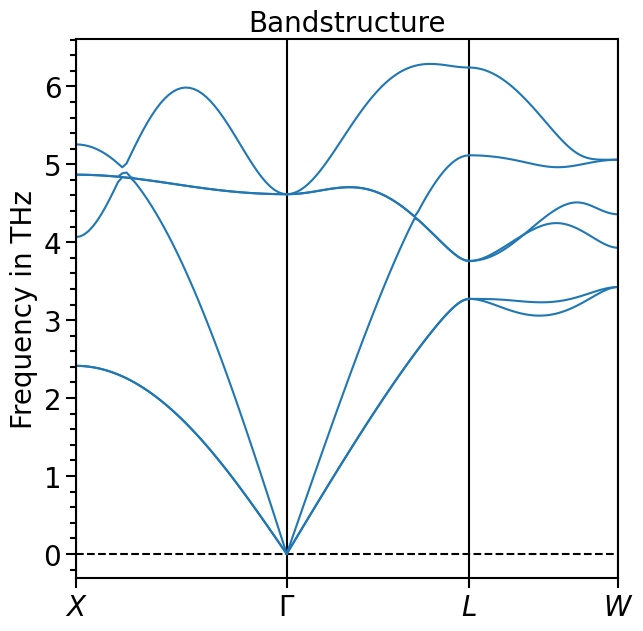

In [4]:
plot = bands_plot.plot("test_band_structure", plot_title="Bandstructure")

## The projected density of states plot

The procedure to plot the projected density of states is very similar to plotting the band structure. There is a function in the `io` sub-package to parse the projected density of states from the output-files:

In [5]:
from aim2dat.io.phonopy import read_atom_proj_density_of_states

pdos = read_atom_proj_density_of_states(
    "files/ph_bands_phonopy/phonopy_disp.yaml",
    force_sets_file_name="files/ph_bands_phonopy/FORCE_SETS",
    mesh=50,
)

In [6]:
from aim2dat.plots.band_structure_dos import DOSPlot

dos_plot = DOSPlot()
dos_plot.y_label = "DOS in states/THz/cell"
dos_plot.import_projected_dos(
    "test_dos",
    pdos["energy"],
    pdos["pdos"],
    sum_kinds=True,
    sum_principal_qn=True,
    sum_magnetic_qn=True,
)

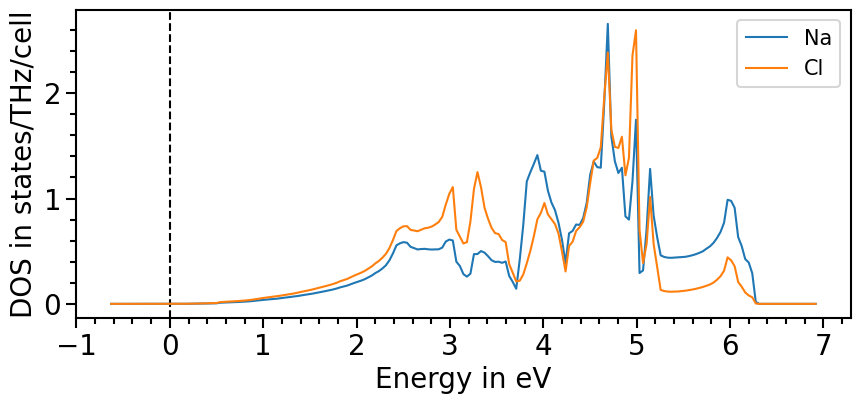

In [7]:
dos_plot.show_plot = True
dos_plot.show_legend = True
dos_plot.ratio = (10, 4)
plot = dos_plot.plot("test_dos")

The total density of states can be included by using the phonopy interface:

In [8]:
from aim2dat.io.phonopy import read_total_density_of_states

tdos = read_total_density_of_states(
    "files/ph_bands_phonopy/phonopy_disp.yaml",
    force_sets_file_name="files/ph_bands_phonopy/FORCE_SETS",
    mesh=50,
)

In [9]:
dos_plot.import_total_dos("test_dos", **tdos)

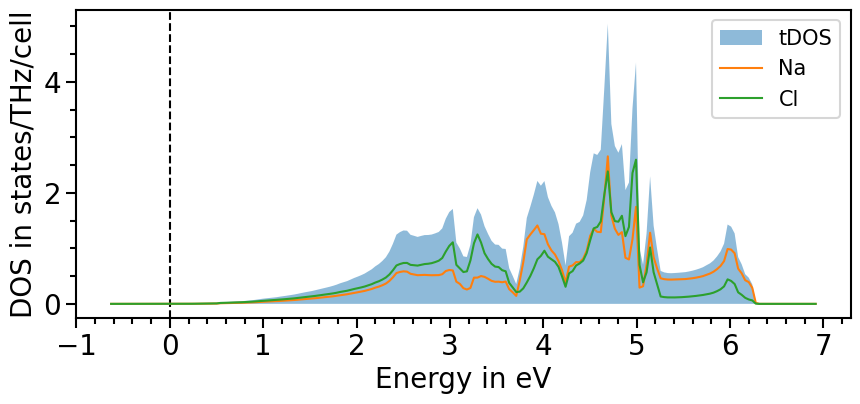

In [10]:
plot = dos_plot.plot("test_dos")

## Band structure + projected density of states plot

The two previous plots can also be combined in one figure with the `BandStructureDOSPlot` class:

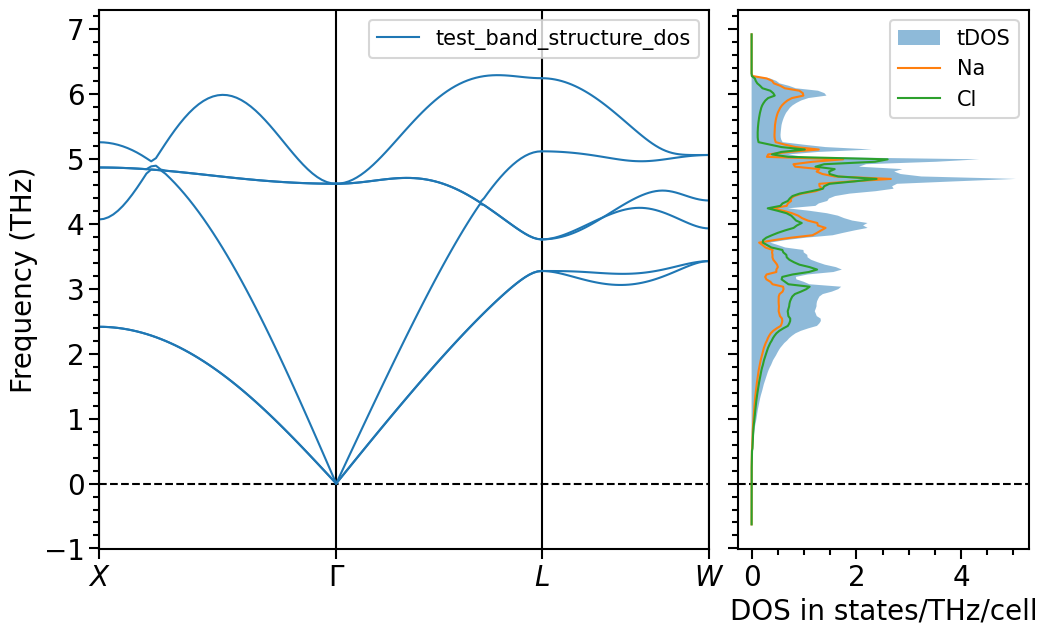

In [11]:
from aim2dat.plots.band_structure_dos import BandStructureDOSPlot

bands_dos_plot = BandStructureDOSPlot()
bands_dos_plot.x_label = (None, "DOS in states/THz/cell")
bands_dos_plot.y_label = ("Frequency (THz)", None)
bands_dos_plot.set_reference_cell(ref_cell)
bands_dos_plot.show_plot = True
bands_dos_plot.show_legend = True
bands_dos_plot.import_band_structure("test_band_structure_dos", **band_structure)
bands_dos_plot.import_projected_dos(
    "test_band_structure_dos",
    pdos["energy"],
    pdos["pdos"],
    sum_kinds=True,
    sum_principal_qn=True,
    sum_magnetic_qn=True,
)
bands_dos_plot.import_total_dos("test_band_structure_dos", **tdos)
plot = bands_dos_plot.plot("test_band_structure_dos")